In [24]:
# Importamos librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

In [25]:
# Cargamos el dataset spotify
file_path = "SpotifyFeatures.csv"
df = pd.read_csv(file_path)




#X = df.drop(columns=['track_id', 'track_name', 'artist_name', 'genre'])

In [26]:
# Obtener un resumen de la información de la base de datos (tipos de datos, valores nulos, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [27]:
# Obtener estadísticas descriptivas de las columnas numéricas
print(df.describe())

          popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000       

In [28]:
#Tamaño del dataset
print(df.shape)
print(type(df.shape))

(232725, 18)
<class 'tuple'>


In [29]:
#Tipos de géneros
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

<Axes: xlabel='genre'>

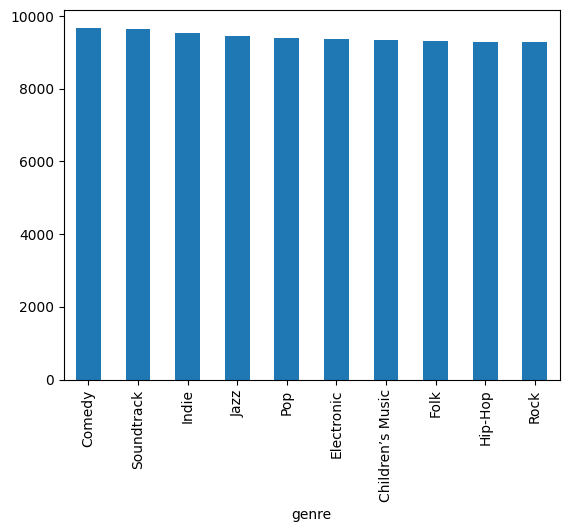

In [30]:
#Cuáles son los géneros musicales más representados en el dataset
df['genre'].value_counts().head(10).plot(kind='bar')

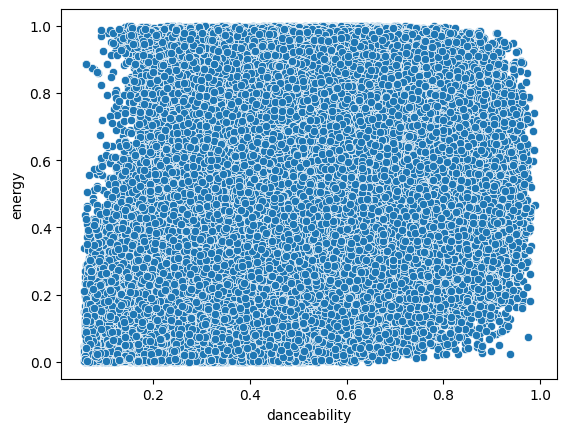

In [31]:
#Existe alguna correlación entre la "danceability(bailable)" y la "energy" de las canciones
import matplotlib.pyplot as plt

sns.scatterplot(x='danceability', y='energy', data=df)
plt.show()

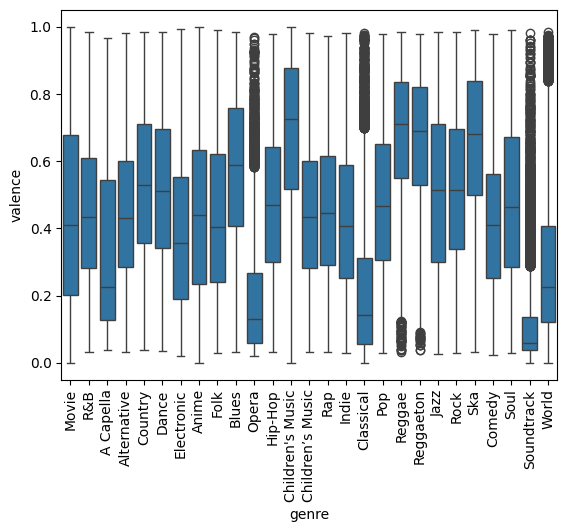

In [32]:
#Cómo varían las características como la "valence" (positividad musical) o el "tempo" entre diferentes géneros
sns.boxplot(x='genre', y='valence', data=df)
plt.xticks(rotation=90)
plt.show()

In [33]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# 2. Calcular la inercia para un rango de valores de k
# Vamos a probar k desde 1 hasta 15
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

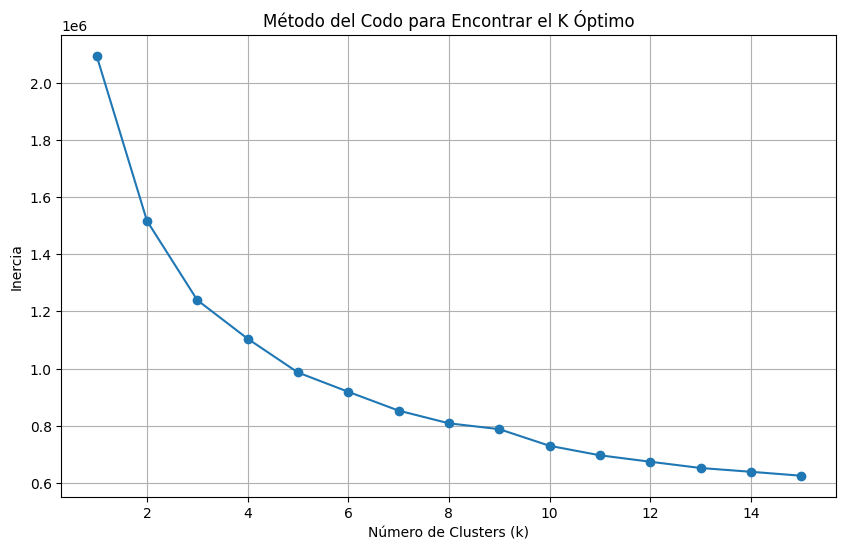

In [35]:
# 3. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Encontrar el K Óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [ ]:
# Suponiendo que el método del codo nos dice que k=5 es el óptimo
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_